In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
import pandas as pd
%run rbf.ipynb

In [61]:

n_gen = 50
n_samples = 3*n_gen
noise = np.random.uniform(low=0.,high=0.25,size=n_gen)
X_0 = np.linspace(-3.,0.,n_gen)
X_1 = np.linspace(-1.,2.,n_gen)
Y_0 = -0.25*(X_0+1.5)**2 + 1.25 + noise
Y_1 = 0.25*(X_1-0.5)**2 + noise
X_2 = np.random.uniform(low=-3.,high=-2.,size=n_gen)
Y_2 = np.random.uniform(low=0.1,high=0.5,size=n_gen)

"""
#try to reproduce the plots from the article
n_gen = 50
n_samples = 3*n_gen
noise = np.random.uniform(low=0.,high=0.25,size=n_gen)
X_0 = np.linspace(-1.,1.,n_gen)
X_1 = np.linspace(-0.25,2.5,n_gen)
Y_0 = -0.5*X_0**2 + 2 + noise
Y_1 = 0.5*(X_1-1)**2 + noise
X_2 = np.random.uniform(low=-1.5,high=1.,size=n_gen)
Y_2 = np.random.uniform(low=-3.25,high=-2.5,size=n_gen)
"""

'\n#try to reproduce the plots from the article\nn_gen = 50\nn_samples = 3*n_gen\nnoise = np.random.uniform(low=0.,high=0.25,size=n_gen)\nX_0 = np.linspace(-1.,1.,n_gen)\nX_1 = np.linspace(-0.25,2.5,n_gen)\nY_0 = -0.5*X_0**2 + 2 + noise\nY_1 = 0.5*(X_1-1)**2 + noise\nX_2 = np.random.uniform(low=-1.5,high=1.,size=n_gen)\nY_2 = np.random.uniform(low=-3.25,high=-2.5,size=n_gen)\n'

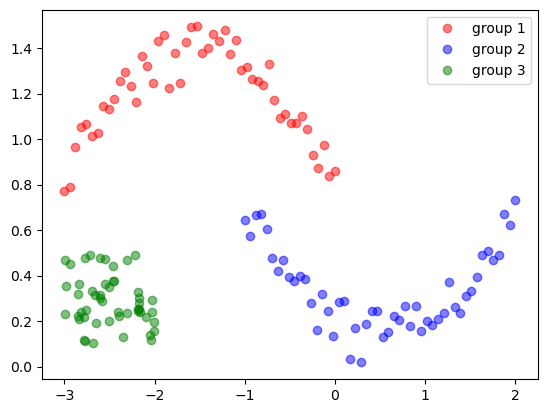

In [62]:
plt.plot(X_0,Y_0,'ro',label='group 1',alpha=0.5)
plt.plot(X_1,Y_1,'bo',label='group 2',alpha=0.5)
plt.plot(X_2,Y_2,'go',label='group 3', alpha=0.5)
plt.legend()

In [63]:
whole_data = np.vstack((np.array((X_0,Y_0)).T,
                        np.array((X_1,Y_1)).T,
                        np.array((X_2,Y_2)).T))

In [76]:
sigma = 1/25
W = np.zeros((n_samples,n_samples))
for i in range(n_samples):
    for k in range(i,n_samples):
        W[i,k] = rbf(x=whole_data[i,:],y=whole_data[k,:],l_squared=sigma)
        if W[i,k] <= 0:
            W[i,k] = 0
        W[k,i] = W[i,k]
    W[i,i] = 1
    
diag_mat = np.eye(n_samples)

for i in range(n_samples):
    diag_mat[i,i] = np.sum(W[i,:])

L = diag_mat - W

eigenvalues, eigenvectors = np.linalg.eig(L)

for i in range(eigenvalues.shape[0]):
    if i<1e-5:
        eigenvalues[i] = 0

sorted_eigenvalues = np.argsort(eigenvalues)

n_cluster = 3
n_components = 4
U = np.zeros((n_samples,n_components))
for i in range(n_components):
    U[:,i] = eigenvectors[:,sorted_eigenvalues[i]]

cluster_fit = KMeans(n_clusters=n_cluster).fit(U)
labels = cluster_fit.predict(U)
df_points = pd.DataFrame(whole_data)
df_points['label'] = labels
df_points.columns = ['x1','x2','label']
colors = {0: 'orange', 1: 'purple',2:'red'}
color_list = [colors[group] for group in df_points['label']]

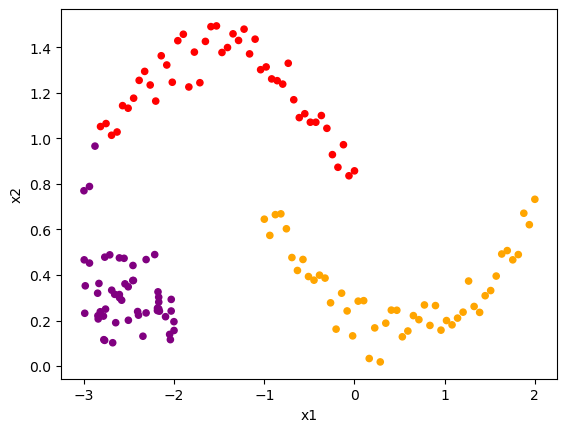

In [77]:
ax = df_points.plot.scatter('x1','x2', c=color_list)

In [78]:
kmeans_test = KMeans(n_clusters=3).fit_predict(whole_data)

In [79]:
kmeans_df = pd.DataFrame(whole_data)
kmeans_df['label'] = kmeans_test
kmeans_df.columns = ['x1','x2','label']

In [80]:
colors_test = {0: 'orange', 1: 'purple',2:'red'}
color_list_test = [colors_test[group] for group in kmeans_df['label']]

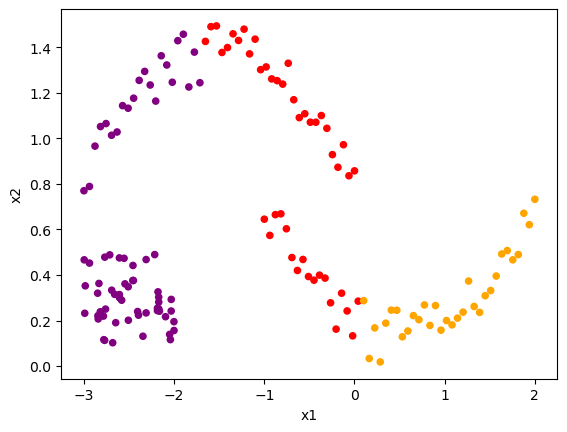

In [81]:
ax = kmeans_df.plot.scatter('x1','x2', c=color_list_test)